# 강화학습(Reinforcement Learning) 실사례 조사
* **논문** : 김영삼. "강화 학습을 이용한 단어 감정 값 및 진술문 상태 값 측정법 연구." 국내박사학위논문 서울대학교, 2018. 서울
    * 링크 :
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=4ca305c42f776743ffe0bdc3ef48d419

## Domain

### [연구 목적] 자연어 텍스트의 점진적(incremental), 연속적(continuous) 처리

* **자연어(Natural Language)** : 일상생활에서 사용하는 언어
* **자연어 처리(Natural Language Processing)** : 자연어의 의미를 분석하여 컴퓨터가 처리할 수 있도록 하는 일
    * '기계에게 인간의 언어를 이해시키는 일'
    * 활용 분야 : 음성 인식, 내용 요약, 번역, 사용자의 감성 분석, 텍스트 분류 작업(스팸 메일 분류, 뉴스 기사 카테고리 분류), 질의 응답 시스템, 챗봇 등
    

* **자연어 텍스트 처리와 인간의 언어 처리** : 자연어 텍스트의 점진적, 연속적 처리는 언어심리학적 관점에서 '인지친화적인 접근법'으로 볼 수 있다. 여러 심리학적, 신경학적 연구 결과들에 의하면 언어 처리의 과정이 기본적으로 자동적, 점진적 처리임이 알려져 있기 때문이다.
    * **인간의 언어 인지 구조** : 언어심리학적 관점에서, 언어 처리를 위해서는 문장의 통사적 구조, 지시체(용어가 가리키는 대상), 사건에 대한 심적 표상 및 정보, 선행사들의 지시 관계 등이 인지적으로 먼저 파악되어야 한다.
    
    
* 따라서, **본 논문의 강화학습에서는 인간의 언어 인지 구조와 유사한 학습 환경을 구축하고, 이 환경에서 언어 처리 기제를 연구한다.**

## Model & 이론 설명

### 연구 과제 구체화
* 자연어 처리는 방대한 과제를 가지고 있는데, 본 논문에서는 **1. 상태 값 측정, 2. 상태 유형 예측**이라는 두 가지 과제를 중점적으로 다룬다.

**1. 상태 값 측정**
* 텍스트의 부분 단위인 연속적 상태에 대한 가치 예측의 문제
* 가치 = 텍스트의 정서적(emotional) 측면과 관련된 값
* 즉, 텍스트 단어들의 '연속적 감정가(sentiment polarity value)를 측정하는 문제
* 방법 : 어휘의 감정 극성값을 **시간 차(temporal difference) 알고리즘(강화학습의 핵심적 알고리즘)**을 통해 측정한다.


**2. 상태 유형 예측**
* 텍스트의 연속적 상태에 대한 가치 예측 및 유형 분류의 문제
* 즉, 어떤 대상의 상태를 기술하는 텍스트가 반영하는 상태의 가치와 그 상태의 유형을 판단하는 문제
* 방법 : 의료 텍스트 문장의 연속적 상태를 강화학습 방법론을 통해 측정한다.
    * 참고 : 이때, 본 논문의 실험은 병원 입원 환자들이 대상이며, 해당 환자들에 대한 간호 진술문들이 의료 텍스트로 정의된다.

### 시간 차 학습 (Temporal-Difference Learning : TD)

**일반적인 TD 알고리즘**
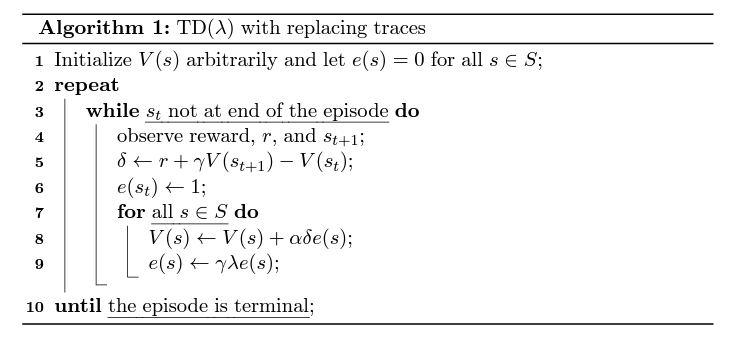

**가장 단순한 시간 차 방법인 TD(0)의 가치 함수 갱신 규칙 (alpha : 학습률)**
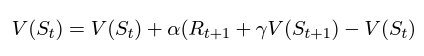

**시간 차 학습 = 다이내믹 알고리즘 + 몬테 카를로 방법**
* '흔적 감쇄율(위 알고리즘에서 lambda)'을 조절함으로써 TD가 되기도 하고, MC(몬테 카를로 방법)이 되기도 한다. 
    * 이때 흔적 감쇄율이 1이면 '매 방문 몬테 카를로 방법(every-visit MC)'과 동일해지는데, 즉 어떤 상태가 episode 안에서 출현할 때마다 평균 리턴 값을 계산하기 위한 방문 카운터와 리턴 값이 증가한다. 
* 특성
    * 점진적(incremental) : 모든 시점에서 상태 값 갱신이 가능하다.
    * Bootstrapping 이용 : 다이내믹 프로그래밍처럼 마르코프 결정 모형을 이용해 상태 값을 측정한다.

### TD를 이용한 모형 기반 강화학습

* 본 논문에서는 시간 차 알고리즘을 이용해, **약물 유해반응과 연관된 간호 진술문의 상태 값을 측정하는 실험**을 소개한다.


* 강화학습에서 Agent는 Action을 통해 환경과 끊임없이 피드백을 주고받게 되는데, 이 피드백이 부실할 경우(Action의 좋고 나쁨을 알려주는 정보가 부족할 경우) Agent는 Action을 최적으로 조절하기 어렵게 된다. = **'희소한 보상 값' 문제**
* 이때 위 실험에서는 1. 한 사람에게 주어지는 진술문의 개수가 매우 많고, 2. 약물 부작용과 연관된 진술문을 특정하기 어렵기 때문에 희소한 보상 값 문제가 발생한다.


* **이 문제를 해결하기 위해 모형 기반 강화학습이 도입되었다.**
* 구체적으로는, '기억 기반적 접근법'에 의존하여 현재 상태가 목표 상태와 얼마나 유사한지를 보상의 기준으로 활용하여 '희소한 보상' 문제를 완화하였다.
    * '상태들의 이행 양상에 대해서는 모형 자유적 접근을 취하고, **보상값 부여에 있어서는 모형 기반적 접근을 취하는 유사-모형 기반적 강화학습**의 형태' (본 논문 67p, 68p)

### 참고) 진술문 상태들의 관계에 대한 TD 방법의 유연성
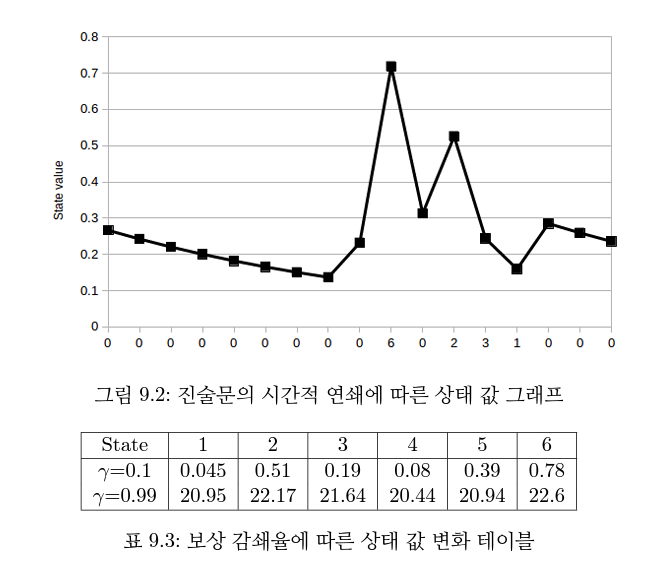
* 진술문 상태들이 서로에 대해 갖는 인과적 관계의 거리를 사전에 알 경우, 이를 보상 감쇄율(gamma)를 통해 조절할 수 있다.
* 만약 상태들이 갖는 인과적 영향력의 거리가 짧다면, gamma를 0에서 1 사이로 낮게 유지하면 되고, 반대의 경우에는 1에 가깝게 gamma 값을 정하는 방식으로 조절할 수 있다.
* 위 그림은 본 연구의 학습 데이터 중 500개를 학습시킨 결과로,약물 부작용 현상에 보상 감쇄율의 변화가 미치는 영향을 보여준다.

**<참고 자료>**
* https://wikidocs.net/21667 (딥 러닝을 이용한 자연어 처리 입문)
* https://daeson.tistory.com/328 (RL(강화학습) 기초 - 7. Temporal-Difference Learning)